In [2]:
from keras.datasets import mnist
from tensorflow.python.keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [3]:
(x_Train, y_Train), (x_Test, y_Test) = mnist.load_data()

In [4]:
x_Train4D = x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D = x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

In [5]:
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

In [6]:
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [8]:
model = Sequential()

model.add(Conv2D(
    filters=16,
    kernel_size=(5,5),
    padding='same',
    input_shape=(28,28,1),
    activation='relu'

))

d:\Program\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [9]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [10]:
model.add(Conv2D(
    filters=36,
    kernel_size=(5,5),
    padding='same',
    activation='relu'

))

In [11]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [12]:
model.add(Dropout(0.25))

In [13]:
model.add(Flatten())

In [14]:
model.add(Dense(128, activation='relu'))

In [15]:
model.add(Dropout(0.5))

In [16]:
model.add(Dense(10, activation='softmax'))

In [17]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 16)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 36)     │        14,436 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 36)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7, 7, 36)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1764)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       225,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,062 (945.55 KB)

 Trainable params: 242,062 (945.55 KB)

 Non-trainable params: 0 (0.00 B)

None


In [18]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [19]:
train_history = model.fit(
    x = x_Train4D_normalize,
    y = y_TrainOneHot,
    validation_split=0.2,
    epochs=10,
    batch_size=300,
    verbose=2
    )

Epoch 1/10
160/160 - 7s - 45ms/step - accuracy: 0.8561 - loss: 0.4679 - val_accuracy: 0.9697 - val_loss: 0.1016
Epoch 2/10
160/160 - 5s - 31ms/step - accuracy: 0.9584 - loss: 0.1396 - val_accuracy: 0.9800 - val_loss: 0.0670
Epoch 3/10
160/160 - 5s - 32ms/step - accuracy: 0.9696 - loss: 0.1015 - val_accuracy: 0.9845 - val_loss: 0.0524
Epoch 4/10
160/160 - 5s - 33ms/step - accuracy: 0.9762 - loss: 0.0813 - val_accuracy: 0.9857 - val_loss: 0.0471
Epoch 5/10
160/160 - 5s - 33ms/step - accuracy: 0.9783 - loss: 0.0702 - val_accuracy: 0.9872 - val_loss: 0.0428
Epoch 6/10
160/160 - 5s - 33ms/step - accuracy: 0.9824 - loss: 0.0583 - val_accuracy: 0.9887 - val_loss: 0.0398
Epoch 7/10
160/160 - 5s - 32ms/step - accuracy: 0.9826 - loss: 0.0568 - val_accuracy: 0.9902 - val_loss: 0.0360
Epoch 8/10
160/160 - 6s - 35ms/step - accuracy: 0.9854 - loss: 0.0489 - val_accuracy: 0.9905 - val_loss: 0.0342
Epoch 9/10
160/160 - 5s - 33ms/step - accuracy: 0.9855 - loss: 0.0463 - val_accuracy: 0.9895 - val_loss:

In [20]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

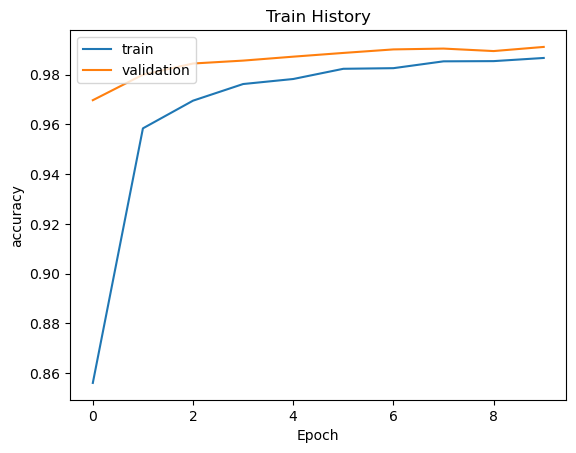

In [21]:
show_train_history(train_history, 'accuracy', 'val_accuracy')

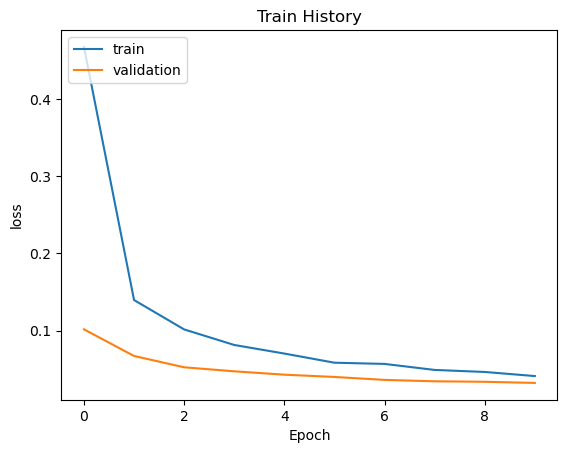

In [22]:
show_train_history(train_history, 'loss', 'val_loss')

In [23]:
scores = model.evaluate(x_Test4D_normalize, y_TestOneHot)
scores[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9902 - loss: 0.0260


0.991599977016449

In [24]:
prediction = model.predict(x_Test4D_normalize)
predicted_labels = np.argmax(prediction, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


NameError: name 'prediction_labels' is not defined

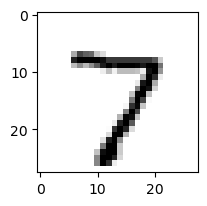

In [25]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)

    if num>25: num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, i+1)
        ax.imshow(images[idx], cmap = 'binary')
        title = "label = " + str(labels[idx])
        if len(prediction_labels)>0:
            title += ", prediction = " + str(prediction_labels[idx])
        ax.set_title(title, fontsize = 10)
        ax.set_xticks([]); ax.set_yticks([])
        idx += 1
    plt.show()

plot_images_labels_prediction(x_Test, y_Test, prediction, idx = 0)

In [ ]:
print("y_Test shape:", y_Test.shape)
print("prediction_labels shape:", prediction_labels.shape)

y_Test shape: (10000,)
prediction_labels shape: (60000,)


In [28]:
prediction_labels = np.argmax(prediction, axis=1)
y_Test = y_Test[:len(prediction_labels)]  # 將 y_Test 截斷為與 prediction_labels 相同的長度

import pandas as pd
confusion_matrix = pd.crosstab(y_Test, prediction_labels, rownames=['label'], colnames=['predict'])
print(confusion_matrix)

predict    0     1     2     3    4    5    6     7    8    9
label                                                        
0        976     0     0     0    0    0    2     1    1    0
1          0  1130     1     2    0    0    1     1    0    0
2          3     0  1024     0    0    0    0     3    2    0
3          1     0     0  1001    0    3    0     1    3    1
4          0     0     0     0  976    0    1     0    0    5
5          2     0     0     4    0  883    2     0    0    1
6          3     2     0     0    1    2  948     0    2    0
7          0     2     6     1    0    1    0  1015    1    2
8          2     0     0     1    1    0    0     1  968    1
9          1     1     0     0    4    2    0     4    2  995
